In [1]:
import numpy as np
import cv2 as cv

In [2]:
img = cv.imread('/data/file/img/dog.jpg')
res = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)


In [3]:
print("img shape:", img.shape)
print("res shape:", res.shape)

img shape: (581, 775, 3)
res shape: (1162, 1550, 3)


In [4]:
img = cv.imread('/data/file/img/dog.jpg')
rows, cols, _ = img.shape

In [5]:
print(rows, cols)

581 775


In [9]:
M = np.float32([[1, 2, 100], [0, 1, 50]])
dst = cv.warpAffine(img, M, (cols, rows))
cv.imshow('img', dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [10]:
M = cv.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0), 90, 1)
dst = cv.warpAffine(img, M, (cols, rows))
cv.imshow('img', dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [11]:
# affine transformation
img = cv.imread('/data/file/img/dog.jpg')
rows, cols, ch = img.shape

(<AxesSubplot:title={'center':'Output'}>,
 Text(0.5, 1.0, 'Output'))

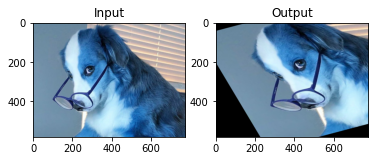

In [14]:
# 原始图像的三个点
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
# 新图像的三个点
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

# 将两个点的变化转成矩阵
M = cv.getAffineTransform(pts1, pts2)
# 将变换作用在图像上
dst = cv.warpAffine(img, M, (cols, rows))
import matplotlib.pyplot as plt
plt.subplot(121), plt.imshow(img),plt.title('Input')
plt.subplot(122), plt.imshow(dst),plt.title('Output')

(<AxesSubplot:title={'center':'Output'}>,
 Text(0.5, 1.0, 'Output'))

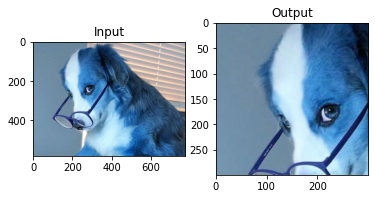

In [15]:
# 找到四个点
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

# 得到变换矩阵
M = cv.getPerspectiveTransform(pts1, pts2)

dst = cv.warpPerspective(img, M, (300, 300))

plt.subplot(121), plt.imshow(img), plt.title("Input")
plt.subplot(122), plt.imshow(dst), plt.title("Output")